In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import sys, os, logging, timeit, glob
from pathlib import Path as Pathlb


from sklearn import preprocessing
from sklearn.metrics import accuracy_score
import itertools

import seaborn as sns

import matplotlib.pyplot as plt

from statannot import add_stat_annotation

In [2]:
# e = pd.read_excel(f'C:\\Project\\master-project\\results\\results\\Result__All.xlsx')
e = pd.read_excel(f'C:\\Project\\master-project\\results\\e2e\\result.xlsx')
# e = e.drop(columns=['Unnamed: 0'])



In [10]:
# e = e[e['classifier_name']=='e2e']
plt.rc('font', size=24) #controls default text size
plt.rc('axes', titlesize=24) #fontsize of the title
plt.rc('axes', labelsize=24) #fontsize of the x and y labels
plt.rc('xtick', labelsize=24) #fontsize of the x tick labels
plt.rc('ytick', labelsize=24) #fontsize of the y tick labels
plt.rc('legend', fontsize=18) #fontsize of the legend


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

46-87 (23 subjects) v.s. 34-71 (23 subjects): Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=6.290e-01 U_stat=2.070e+02
34-71 (23 subjects) v.s. 04-32 (23 subjects): Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=2.580e+02
46-87 (23 subjects) v.s. 04-32 (23 subjects): Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=9.832e-01 U_stat=2.195e+02


(<AxesSubplot:xlabel='Subject ID', ylabel='Balanced Accuracy'>,
  <statannot.StatResult.StatResult at 0x26eb125cca0>])

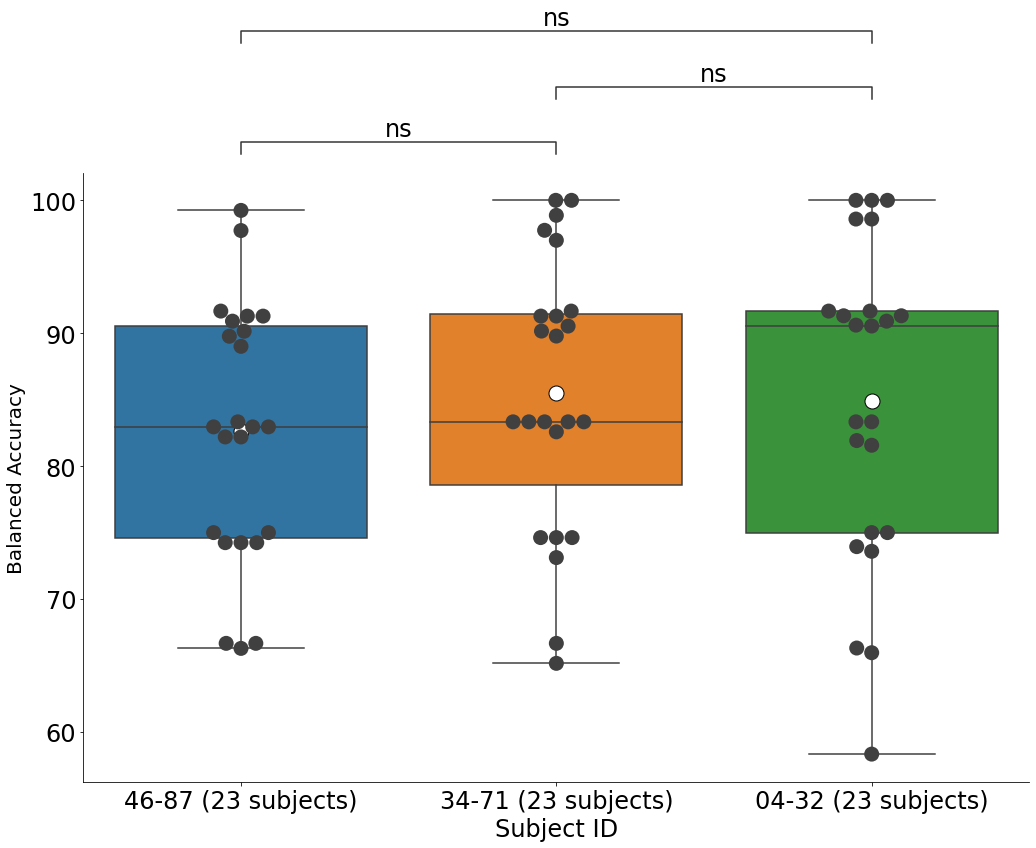

In [11]:
#    'EER', 
#    'ACC_ud', 'BACC_ud', 'FAR_ud', 'FRR_ud', ',
#    'unknown_imposter_samples', 'AUS_All', 'FAU_All', 'CM_bd_TN',
#    'CM_bd_FP', 'CM_bd_FN', 'CM_bd_TP', 'CM_ud_TN', 'CM_ud_FP', 'CM_ud_FN', 'CM_ud_TP',hue="Accuracy",
X="BACC_ud"
sns.catplot(x="Subject ID", y=X, kind="box", data=e, height=10, aspect=1.5, showmeans=True, 
                    meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"15"})
plt.ylabel('balanced Accuracy', fontsize=20)
ax = sns.swarmplot(x="Subject ID", y=X, data=e, color=".25", size=15)

plt.ylabel('Balanced Accuracy', fontsize=20)

box_pairs=[
    ('46-87 (23 subjects)', '34-71 (23 subjects)'),
    ('04-32 (23 subjects)', '34-71 (23 subjects)'),
    ('46-87 (23 subjects)', '04-32 (23 subjects)'),
    ]

add_stat_annotation(ax, data=e, y=X, x="Subject ID",# hue=hue, 
                    box_pairs=box_pairs,
                    test='Mann-Whitney', text_format='star', loc='outside', verbose=2)  



In [14]:
kwargs = {'a':1, 'b':2}
c="b"
[exec(f"{i}=1+kwargs[c]".replace("'","")) for i in kwargs.keys()]
[print(f"{i}=1+kwargs[c]".replace("'","")) for i in kwargs.keys()]


a=1+kwargs[c]
b=1+kwargs[c]


[None, None]